In [1]:
import sympy
sympy.init_printing()

In [2]:
alpha, beta, l_i = sympy.symbols("alpha beta l_i")

In [3]:
def area_exp(x_stretch, y_stretch, start_l):
    return x_stretch * y_stretch * (3 * sympy.sqrt(3) / 2) * start_l * start_l

def perim_exp(x_stretch, y_stretch, start_l):
    return 2 * start_l * sympy.sqrt( x_stretch**2 + 3 * y_stretch**2 ) + 2 * x_stretch * start_l

In [4]:
area_exp(alpha, beta, l_i)

In [5]:
perim_exp(alpha, beta, l_i)

In [6]:
def energy_exp_for_cell(area_c, perim_c, area_rest, perim_rest, k_area, k_perim):
    return k_area * (area_c - area_rest) ** 2 + k_perim * (perim_c - perim_rest) ** 2

In [7]:
energy_exp_for_cell(*sympy.symbols("A P A_0 P_0 k_A k_P"))

## Show energy as a function of alpha and beta. Assuming hexagon with side l_i is the rest state.

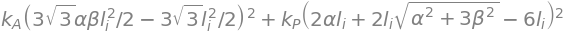

In [8]:
k_A ,k_P = sympy.symbols("k_A k_P")

A_0 = area_exp(1,1, l_i)
P_0 = perim_exp(1, 1, l_i)

energy_for_alphabeta = energy_exp_for_cell(
    area_c=area_exp(alpha, beta, l_i),
    perim_c=perim_exp(alpha, beta, l_i),
    area_rest=A_0,
    perim_rest=P_0,
    k_area=k_A,
    k_perim=k_P
)

energy_for_alphabeta

# Hessian matrix in terms of alpha and beta:

In [92]:
# dE_dalpha = sympy.diff(energy_for_alphabeta, alpha)
# dE_dbeta = sympy.diff(energy_for_alphabeta, beta)
sympy.hessian(energy_for_alphabeta, [alpha, beta])
# dE_dalpha.subs([
#     (alpha, 1),
#     (beta, 1),
# ])

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢    2       4                                                             ⎛   ↪
⎢27⋅β ⋅k_A⋅lᵢ        ⎛    2⋅α⋅lᵢ           ⎞ ⎛    4⋅α⋅lᵢ           ⎞       ⎜   ↪
⎢───────────── + k_P⋅⎜────────────── + 2⋅lᵢ⎟⋅⎜────────────── + 4⋅lᵢ⎟ + k_P⋅⎜-  ↪
⎢      2             ⎜   ___________       ⎟ ⎜   ___________       ⎟       ⎜   ↪
⎢                    ⎜  ╱  2      2        ⎟ ⎜  ╱  2      2        ⎟       ⎜   ↪
⎢                    ⎝╲╱  α  + 3⋅β         ⎠ ⎝╲╱  α  + 3⋅β         ⎠       ⎝   ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                       6⋅β⋅k_ ↪
⎢                           

### Evaluate hessian at alpha and beta equal to one, aka the equilibrium:

In [211]:
sympy.hessian(energy_for_alphabeta, [alpha, beta]).subs([
    (alpha, 1),
    (beta, 1),
])

⎡         4                        4             ⎤
⎢27⋅k_A⋅lᵢ             2  27⋅k_A⋅lᵢ             2⎥
⎢────────── + 18⋅k_P⋅lᵢ   ────────── + 18⋅k_P⋅lᵢ ⎥
⎢    2                        2                  ⎥
⎢                                                ⎥
⎢         4                        4             ⎥
⎢27⋅k_A⋅lᵢ             2  27⋅k_A⋅lᵢ             2⎥
⎢────────── + 18⋅k_P⋅lᵢ   ────────── + 18⋅k_P⋅lᵢ ⎥
⎣    2                        2                  ⎦

## How do we get forces?
$$F_x \propto - \frac{\partial E}{\partial \alpha} \left(\alpha, \beta\right) $$
$$F_y \propto - \frac{\partial E}{\partial \beta} \left(\alpha, \beta\right) $$

Since the system is at equilibrium when alpha and beta are equal to one, the derivative of E wrt. alpha or beta becomes:

$$ \frac{\partial E}{\partial \alpha} \approx \frac{\partial^2 E}{\partial \alpha^2} \cdot \left(\delta \alpha\right) + \frac{\partial^2 E}{\partial \alpha \partial \beta} \cdot \left(\delta \beta \right) $$

$$ \frac{\partial E}{\partial \beta} \approx \frac{\partial^2 E}{\partial \alpha\partial \beta} \cdot \left(\delta \alpha\right) + \frac{\partial^2 E}{\partial \beta^2} \cdot \left(\delta \beta \right) $$



Given a specific $\delta\alpha$, to get $F_y=0$ equilibrium we need $\frac{\partial E}{\partial \beta} = 0$:

$$ 0 = \frac{\partial^2 E}{\partial \alpha\partial \beta} \cdot \left(\delta \alpha\right) + \frac{\partial^2 E}{\partial \beta^2} \cdot \left(\delta \beta \right) $$
Holding the $\delta\alpha$ constant and solving for $\delta\beta$:
$$ \left(\delta \beta \right) = - \left(\frac{\partial^2 E}{\partial \beta^2}\right)^{-1} \frac{\partial^2 E}{\partial \alpha\partial \beta} \cdot \left(\delta \alpha\right)  $$

### Using sympy to find $\delta\beta$ for given $\delta\alpha$ :

In [212]:

# def get_analytic_poisson_ratio(

ddE_dbb = sympy.diff(energy_for_alphabeta, alpha, alpha).subs([
    (alpha, 1),
    (beta, 1),
])
ddE_dab = sympy.diff(energy_for_alphabeta, alpha, beta).subs([
    (alpha, 1),
    (beta, 1),
])

poisson_ratio = sympy.simplify(ddE_dab * (1 / ddE_dbb))

poisson_ratio

## So, poisson ratio is just one for infinitesimal changes.

What if we solve for equilibrium delta beta for arbitrary delta alpha?
Hold everything constant except beta, and find energy minimum.

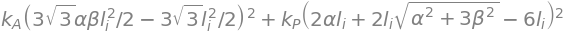

In [213]:
# dE_db = sympy.diff(energy_for_alphabeta, beta)
energy_for_alphabeta
# dE_db

In [214]:
E_func = sympy.lambdify([alpha, beta, l_i, k_A, k_P], energy_for_alphabeta)

E_func

<function _lambdifygenerated(alpha, beta, l_i, k_A, k_P)>

In [215]:
import numpy as np
# xx

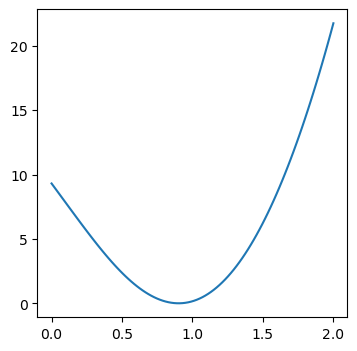

In [216]:
from matplotlib import pyplot as plt

def try_graph_energy_for_beta():
    
    xx = np.linspace(0,2,100)
    EE = [E_func(alpha=1.1, beta=b_va, l_i=1, k_A=1, k_P=1) for b_va in xx]
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    ax.plot(xx,EE)

try_graph_energy_for_beta()

In [217]:
import scipy.optimize


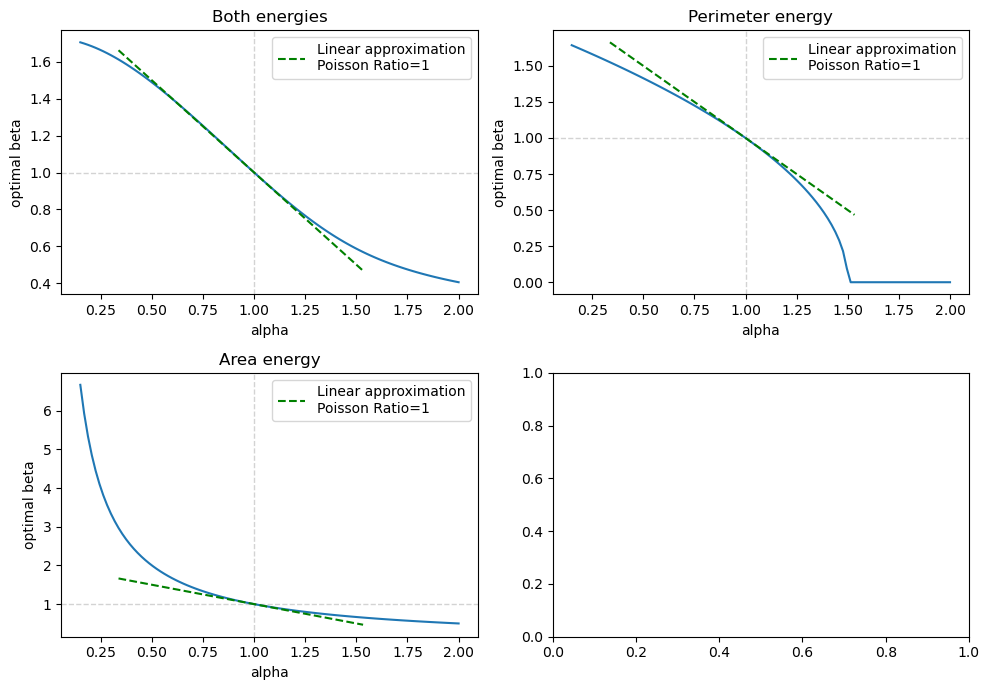

In [218]:

def get_optimal_beta_for_alpha(alph_val, l_i, k_A, k_P, beta_bounds=(0,8)):
    def E_of_just_beta(beta_val):
        return E_func(alpha=alph_val, beta=beta_val, l_i=l_i, k_A=k_A, k_P=k_P)
    res = scipy.optimize.minimize_scalar(E_of_just_beta, method="bounded", bounds=beta_bounds)
    return res.x


def graph_optbeta_vs_alpha(l_i=1, k_A=1, k_P=1, ax=ax, alpha_plot_range=(0.15,2)):
    xx_alph = np.linspace(alpha_plot_range[0], alpha_plot_range[1],100)
    yy_betopt = [get_optimal_beta_for_alpha(alph_val, l_i=l_i, k_A=k_A, k_P=k_P) for alph_val in xx_alph]


    ax.axvline(1, linestyle='--', color='lightgray', linewidth=1)
    ax.axhline(1, linestyle='--', color='lightgray', linewidth=1)
    ax.plot(xx_alph, yy_betopt)

    line_from_loc_deriv = - poisson_ratio * (xx_alph - 1) + 1

    ax.plot(xx_alph[10:75], line_from_loc_deriv[10:75], linestyle="--", color='green', label="Linear approximation\nPoisson Ratio={}".format(poisson_ratio))

    ax.set_xlabel("alpha")
    ax.set_ylabel("optimal beta")
    ax.legend(loc='upper right')


fig, ax = plt.subplots(2,2,figsize=(10,7))

graph_optbeta_vs_alpha(ax=ax[0][0])
ax[0][0].title.set_text('Both energies')

graph_optbeta_vs_alpha(k_A=0,k_P=1,ax=ax[0][1])
ax[0][1].title.set_text('Perimeter energy')

graph_optbeta_vs_alpha(k_A=1,k_P=0,ax=ax[1][0] ) #, alpha_plot_range=(0.5,1.5))
ax[1][0].title.set_text('Area energy')

plt.tight_layout()# plt.legend()

In [161]:

# get_optimal_beta_for_alpha(1.5)

In [162]:

# get_optimal_beta_for_alpha(1.9)